<br>
<center>

# Assignments for Week 11

</center>

<div style="text-align: right; width: 15%; margin-left: auto;">
    
Jon Cannaday <br>
DSC 550 <br>
5/22/2024  

</div>


## Libraries

Load and preprocess the data: 
images can be normalized to have pixel values between 0 and 1.

In [4]:
import numpy as np
import keras 
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [15]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

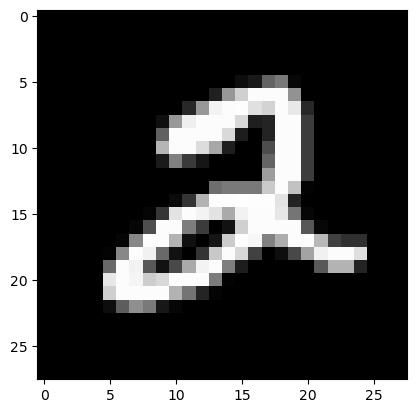

In [18]:
# pick a sample to plot
sample = 1
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

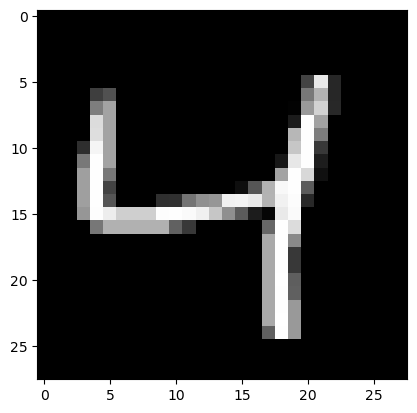

In [19]:
# pick a sample to plot
sample = 2
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

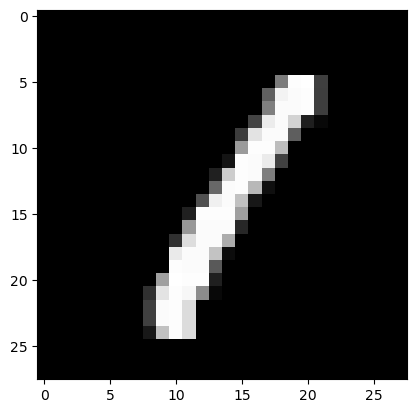

In [20]:
# pick a sample to plot
sample = 3
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

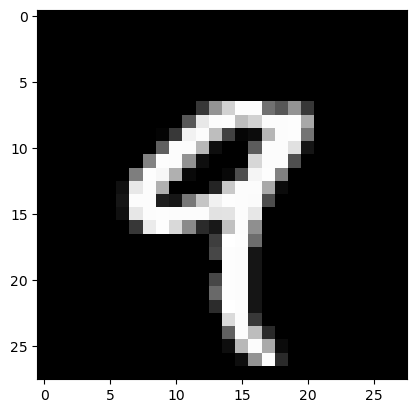

In [21]:
# pick a sample to plot
sample = 4
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

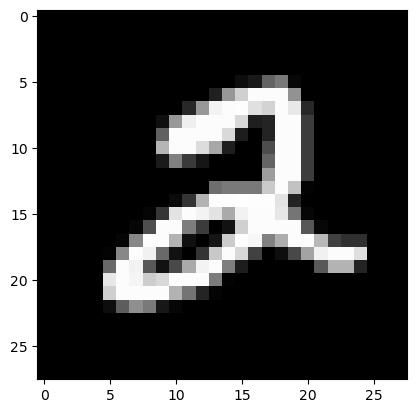

In [22]:
# pick a sample to plot
sample = 5
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

Define the model architecture: 
convolutional layers, pooling layers, and fully-connected layers.

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Compile the model:
loss function, an optimizer, and a metric for evaluation.

In [6]:
img_rows, img_cols=28, 28
 
if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)
 
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Train the model:

In [7]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [8]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [9]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
 
model.fit(x_train, y_train, epochs=12, batch_size=500)

Epoch 1/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 48s 375ms/step - accuracy: 0.1134 - loss: 2.4494
Epoch 2/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 43s 357ms/step - accuracy: 0.1128 - loss: 2.4386
Epoch 3/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 46s 381ms/step - accuracy: 0.1146 - loss: 2.4218
Epoch 4/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 49s 407ms/step - accuracy: 0.1143 - loss: 2.4043
Epoch 5/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 43s 354ms/step - accuracy: 0.1158 - loss: 2.3913
Epoch 6/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 46s 384ms/step - accuracy: 0.1162 - loss: 2.3771
Epoch 7/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 51s 427ms/step - accuracy: 0.1195 - loss: 2.3601
Epoch 8/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 48s 399ms/step - accuracy: 0.1187 - loss: 2.3531
Epoch 9/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 48s 398ms/step - accuracy: 0.1226 - loss: 2.3399
Epoch 10/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 49s 408ms/step - accuracy: 0.1259 - loss: 2.3252
Epoch 11/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 356ms/step - accuracy: 0.1314 - loss: 2.3122
Epoch 12/12
120/120

Evaluate the model: The trained model can be evaluated on the test set using the Keras evaluate() function. The evaluation metric typically used for classification tasks is accuracy.

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 2.291276216506958
accuracy= 0.11869999766349792


Looks like this model did poorly with identifying the hand written numbers. This could be due to the lack of experieance on my end with setting up this properly but non the less we are getting aswers and that is a win for me. Half the battle fo rme was to get the proper libraries downloaded and had to exstend file naming on my computer which God know what i messed up on the software side of my laptop now. But it looks lke the import contains many hand written numbers. the model attempts to identify each pixel and score the pixel. then go through each one and create some sort of triginomic / linear algebra answer that aligns the color scales to a known number. in this case it looks like the model did fairly poor. about 10 % accuracy which again is amazing that a computer can perform even the slightest inturpretation of hand written anything. great times we live in.